# Introduction

The purpose of this notebook is to test and evaluate increase the resolution of MRI images T2SPIR and T1 dual (both phases) from 256x256 resolution to 512x512 resolution using classical super resolution methods but also pre trained deep learning methods

# Loading in Libraries

In [1]:

from ISR.models import RDN

Using TensorFlow backend.


In [8]:
!git status

On branch master
Your branch is up-to-date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   jupyter_notebooks/Main notebooks/EDA grey level visualisation.ipynb
	modified:   jupyter_notebooks/Main notebooks/GCLM_texture_patch_small_scale_sampling.ipynb
	modified:   jupyter_notebooks/Main notebooks/renaming and resizing ground files.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/Download_files_boto3-checkpoint.ipynb
	Download_files_boto3.ipynb
	data/
	jupyter_notebooks/Main notebooks/.ipynb_checkpoints/

no changes added to commit (use "git add" and/or "git commit -a")


In [5]:
!git add .

In [ ]:
git commit -m 

In [6]:
!git reset

Unstaged changes after reset:
M	jupyter_notebooks/Main notebooks/EDA grey level visualisation.ipynb
M	jupyter_notebooks/Main notebooks/GCLM_texture_patch_small_scale_sampling.ipynb
M	jupyter_notebooks/Main notebooks/renaming and resizing ground files.ipynb


In [282]:
import PIL
import numpy as np
import imageio
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.color import gray2rgb,rgb2gray
from PIL import Image
import os
import cv2
import ipdb
import seaborn as sns

# Loading in images for analysis

In [127]:
cd F:\Biomedical images\Train\NIFTI_MR_N4_DICOM

F:\Biomedical images\Train\NIFTI_MR_N4_DICOM


In [219]:
#Setting up destination paths 
dst_path_256=r'F:\Biomedical images\Train\NIFTI_MR_512x512 png 16grey lvl'
dst_path_16=r'F:\Biomedical images\Train\NIFTI_MR_512x512 png 256grey lvl'
img_paths=os.listdir(dst_path_256)
folder_types=os.listdir(os.path.join(dst_path_256,img_paths[0]))

In [432]:
ls

 Volume in drive F is Seagate Expansion Drive
 Volume Serial Number is A2E2-92D1

 Directory of F:\Biomedical images\Train\NIFTI_MR_N4_DICOM

06/10/2019  21:45    <DIR>          .
06/10/2019  21:45    <DIR>          ..
23/07/2019  21:52    <DIR>          1
23/07/2019  21:52    <DIR>          10
23/07/2019  21:52    <DIR>          13
23/07/2019  21:52    <DIR>          15
23/07/2019  21:52    <DIR>          19
23/07/2019  21:52    <DIR>          2
23/07/2019  21:52    <DIR>          20
23/07/2019  21:52    <DIR>          21
23/07/2019  21:52    <DIR>          22
23/07/2019  21:52    <DIR>          3
23/07/2019  21:52    <DIR>          31
23/07/2019  21:52    <DIR>          32
23/07/2019  21:52    <DIR>          33
23/07/2019  21:52    <DIR>          34
23/07/2019  21:52    <DIR>          36
23/07/2019  21:52    <DIR>          37
23/07/2019  21:52    <DIR>          38
23/07/2019  21:53    <DIR>          39
23/07/2019  21:53    <DIR>          5
23/07/2019  21:53    <DIR>          8
06/10/

In [402]:
t1dual_inphase_hists=np.zeros((65536,1)).astype(np.uint8)
t1dual_outphase_hists=np.zeros((65536,1)).astype(np.uint8)
t2spir_hists=np.zeros((65536,1)).astype(np.uint8)

for root, dirs, files in os.walk(".", topdown=False):
    print(root)
    for file in files:
        
        img = imageio.imread(os.path.join(root,file))
        #img=bytescaling(img)
        hist = cv2.calcHist([img],[0],None,[65536],[0,65536])
        
        if file.lower().find('t1dualinphase')!=-1:
            #t1dual_inphase_hists=np.concatenate((t1dual_inphase_hists,img.flatten()))
            t1dual_inphase_hists=np.add(t1dual_inphase_hists,hist)
            
        elif file.lower().find('t1dualoutphase')!=-1:
            #t1dual_outphase_hists=np.concatenate((t1dual_outphase_hists,img.flatten()))
            t1dual_outphase_hists=np.add(t1dual_outphase_hists,hist)
            
        elif file.lower().find('t2spir')!=-1:
            #t2spir_hists=np.concatenate((t2spir_hists,img.flatten()))
            t2spir_hists=np.add(t2spir_hists,hist)
        
        

.\1\T1DUAL\DICOM_anon\InPhase
.\1\T1DUAL\DICOM_anon\OutPhase
.\1\T1DUAL\DICOM_anon
.\1\T1DUAL\Ground
.\1\T1DUAL
.\1\T2SPIR\DICOM_anon
.\1\T2SPIR\Ground
.\1\T2SPIR
.\1
.\10\T1DUAL\DICOM_anon\InPhase
.\10\T1DUAL\DICOM_anon\OutPhase
.\10\T1DUAL\DICOM_anon
.\10\T1DUAL\Ground
.\10\T1DUAL
.\10\T2SPIR\DICOM_anon
.\10\T2SPIR\Ground
.\10\T2SPIR
.\10
.\13\T1DUAL\DICOM_anon\InPhase
.\13\T1DUAL\DICOM_anon\OutPhase
.\13\T1DUAL\DICOM_anon
.\13\T1DUAL\Ground
.\13\T1DUAL
.\13\T2SPIR\DICOM_anon
.\13\T2SPIR\Ground
.\13\T2SPIR
.\13
.\15\T1DUAL\DICOM_anon\InPhase
.\15\T1DUAL\DICOM_anon\OutPhase
.\15\T1DUAL\DICOM_anon
.\15\T1DUAL\Ground
.\15\T1DUAL
.\15\T2SPIR\DICOM_anon
.\15\T2SPIR\Ground
.\15\T2SPIR
.\15
.\19\T1DUAL\DICOM_anon\InPhase
.\19\T1DUAL\DICOM_anon\OutPhase
.\19\T1DUAL\DICOM_anon
.\19\T1DUAL\Ground
.\19\T1DUAL
.\19\T2SPIR\DICOM_anon
.\19\T2SPIR\Ground
.\19\T2SPIR
.\19
.\2\T1DUAL\DICOM_anon\InPhase
.\2\T1DUAL\DICOM_anon\OutPhase
.\2\T1DUAL\DICOM_anon
.\2\T1DUAL\Ground
.\2\T1DUAL
.\2\T2SPIR\DICOM_

C:\Anaconda3\lib\site-packages\PIL\Image.py:2600: DecompressionBombWarning: Image size (144000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [424]:
sum(t1dual_inphase_hists)

array([46092056.], dtype=float32)

In [425]:
t1dual_inphase_hists[1:2]

array([[2466383.]], dtype=float32)

In [403]:
t2spir_cdf_arr=CDF_estimation(t2spir_hists,1)
t1dual_inphase_cdf_arr=CDF_estimation(t1dual_inphase_hists,1)
t1dual_outphase_cdf_arr=CDF_estimation(t1dual_outphase_hists,1)

In [407]:
np.save('t1dual_outphase_cdf_uint16',t1dual_outphase_cdf_arr,allow_pickle=True)

In [430]:
t1dual_outphase_cdf_arr[:350]

array([0.09, 0.16, 0.2 , 0.23, 0.26, 0.28, 0.29, 0.31, 0.32, 0.33, 0.34,
       0.35, 0.36, 0.36, 0.37, 0.37, 0.38, 0.38, 0.38, 0.39, 0.39, 0.39,
       0.4 , 0.4 , 0.4 , 0.41, 0.41, 0.41, 0.41, 0.42, 0.42, 0.42, 0.42,
       0.42, 0.43, 0.43, 0.43, 0.43, 0.43, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.45, 0.45, 0.45, 0.45, 0.45, 0.46, 0.46, 0.46, 0.46, 0.46, 0.47,
       0.47, 0.47, 0.47, 0.47, 0.48, 0.48, 0.48, 0.48, 0.48, 0.49, 0.49,
       0.49, 0.49, 0.49, 0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.51, 0.51, 0.51,
       0.51, 0.51, 0.52, 0.52, 0.52, 0.52, 0.52, 0.53, 0.53, 0.53, 0.53,
       0.53, 0.54, 0.54, 0.54, 0.54, 0.54, 0.55, 0.55, 0.55, 0.55, 0.55,
       0.55, 0.56, 0.56, 0.56, 0.56, 0.56, 0.57, 0.57, 0.57, 0.57, 0.57,
       0.58, 0.58, 0.58, 0.58, 0.58, 0.59, 0.59, 0.59, 0.59, 0.59, 0.6 ,
       0.6 , 0.6 , 0.6 , 0.6 , 0.61, 0.61, 0.61, 0.61, 0.61, 0.62, 0.62,
       0.62, 0.62, 0.62, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.64, 0.64,
       0.64, 0.64, 0.64, 0.64, 0.65, 0.65, 0.65, 0.

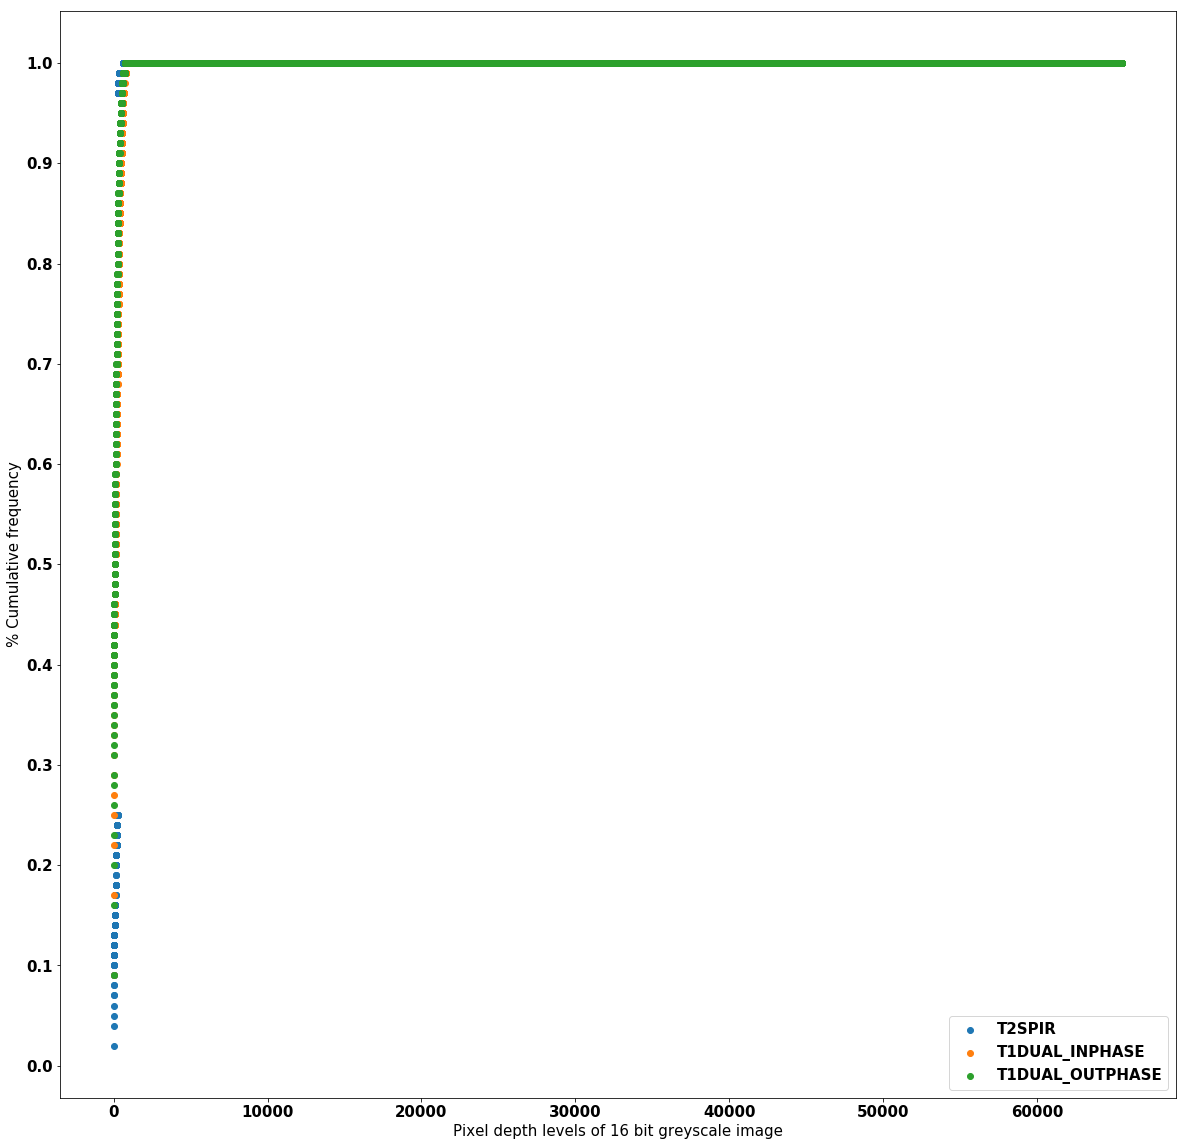

In [411]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)

plt.figure(figsize=(20,20))
plt.scatter(np.arange(65534),t2spir_cdf_arr)
plt.scatter(np.arange(65534),t1dual_inphase_cdf_arr)
plt.scatter(np.arange(65534),t1dual_outphase_cdf_arr)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel('% Cumulative frequency')
plt.xlabel('Pixel depth levels of 16 bit greyscale image')
plt.legend(['T2SPIR','T1DUAL_INPHASE','T1DUAL_OUTPHASE'])
plt.savefig('CDF_Grey_16bit_per_img_type.jpeg',dpi=600)

In [348]:
def CDF_estimation(histogram_vals,strt_pt):
    
    hist_bins=histogram_vals.shape[0]
    
    total_val=sum(histogram_vals[strt_pt:])
    cum_sum_arr=[]
    
    for i in range(strt_pt+1,hist_bins):
   
        tmp_cum_sum=float(sum(histogram_vals[strt_pt:i])/total_val)
        
        cum_sum_arr.append(round(tmp_cum_sum,2))
        
    return np.array(cum_sum_arr)

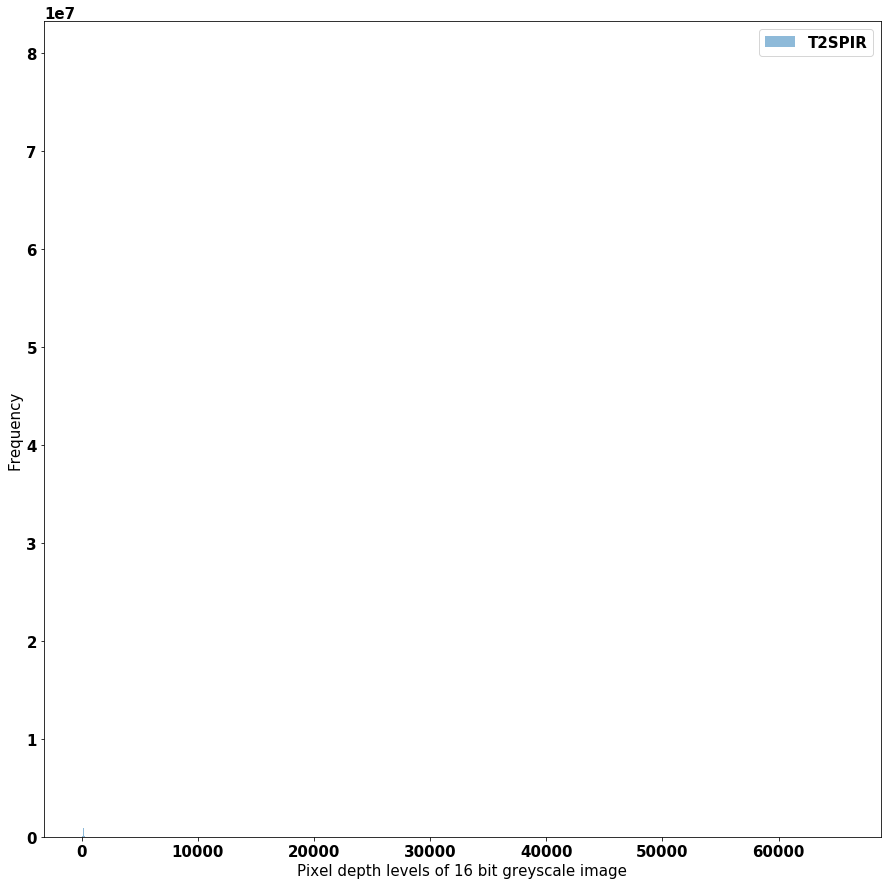

In [412]:
plt.figure(figsize=(15,15))
plt.hist(list(range(1,65536)),bins=65535,weights=t2spir_hists[1:],alpha=0.5,label='T2SPIR')

plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Pixel depth levels of 16 bit greyscale image')
plt.savefig('histogram_bitdepth_t2spir_16bit.jpeg',dpi=600)

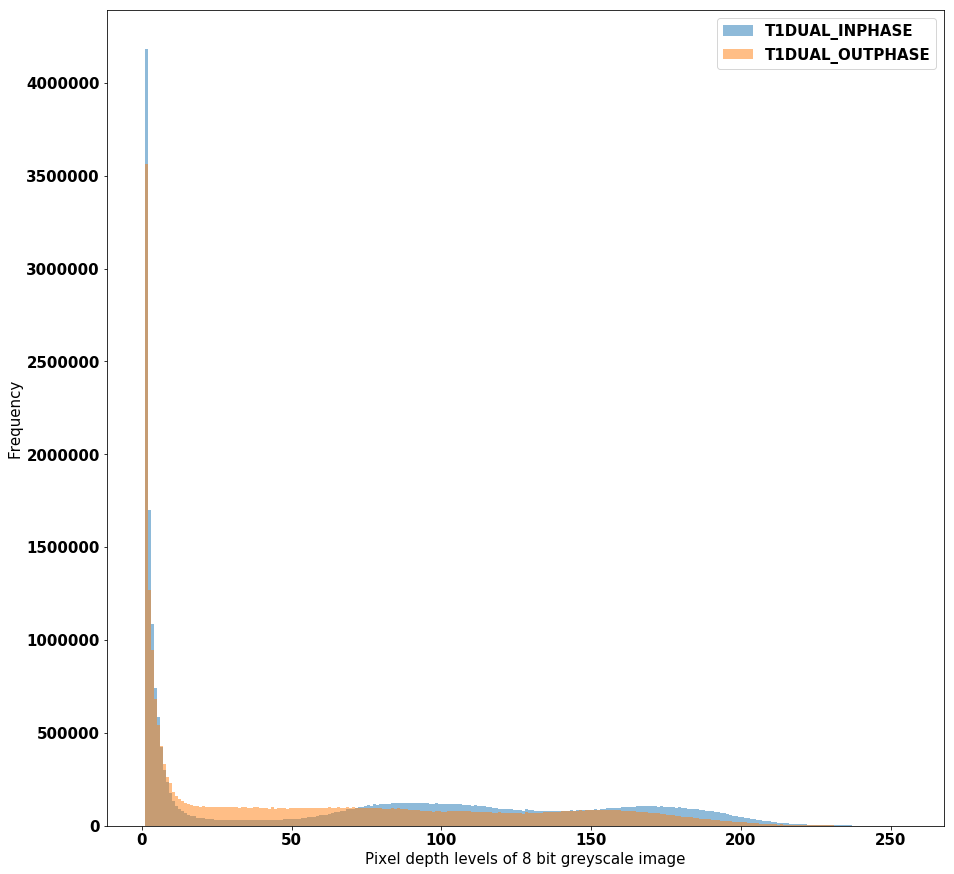

In [384]:
plt.figure(figsize=(15,15))
plt.hist(list(range(1,65536)),bins=65535,weights=t1dual_inphase_hists[1:],alpha=0.5,label='T1DUAL_INPHASE')
plt.hist(list(range(1,65536)),bins=65535,weights=t1dual_outphase_hists[1:],alpha=0.5,label='T1DUAL_OUTPHASE')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Pixel depth levels of 16 bit greyscale image')
plt.savefig('histogram_bitdepth_t1dual_16bit.jpeg',dpi=600)

In [261]:
img = imageio.imread(os.path.join(r'F:\Biomedical images\Train\NIFTI_MR_N4_DICOM\1\T1DUAL\DICOM_anon\InPhase','1T1DUALInPhase_slice_no_10.dcm'))

hist = cv2.calcHist([img],[0],None,[256],[0,256])



In [254]:
os.path.join(root,file)

'.\\19\\T1DUAL\\DICOM_anon\\InPhase\\19T1DUALInPhase_slice_no_1.dcm'

.\1\T1DUAL\DICOM_anon\InPhase
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
.\1\T1DUAL\DICOM_anon\OutPhase
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
.\1\T1DUAL\DICOM_anon
.\1\T1DUAL\Ground
.\1\T1DUAL
.\1\T2SPIR\DICOM_anon
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
.\1\T2SPIR\Ground
.\1\T2SPIR
.\1
.\10\T1DUAL\DICOM_anon\InPhase
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 

KeyboardInterrupt: 

In [223]:
cd F:\Biomedical images\Train\NIFTI_MR_512x512 png 256grey lvl\t1dualinphase\Source

F:\Biomedical images\Train\NIFTI_MR_512x512 png 256grey lvl\t1dualinphase\Source


# Functions calls for image resizing

In [200]:
def img_resize(img,resize_sp):
    """the purpose of this method is to resize image using general linear intepolation. """
    
    PIL_img=Image.fromarray(img)
    
    PIL_img_resize=PIL_img.resize((resize_sp,resize_sp))
    
    return np.array(PIL_img_resize)

In [191]:
t1_dual_splits=['inphase','outphase']
pat_splits=['t1dual','t2spir']
combo_split_list=[t1_dual_splits,pat_splits]

def reformat_file_str_underscore(strs,combo_split_list):
    
    """The purpose of this method is to rename files wrt to split of the naming concentions file structure for ease of use. """
    
    tmp_str_lower=strs.lower()
    #splitting name wrt to combo lists above. 
    split_combo=[y for x in combo_split_list for y in x if tmp_str_lower.find(y)!=-1]
    #Splitting list by combinations.
    tmp_str_concat=None
    for splts in split_combo:
        
        if tmp_str_concat is None:
            tmp_str_split=tmp_str_lower.split(splts)
            tmp_str_concat=tmp_str_split[0]+'_'+splts+tmp_str_split[1]
            
        else:
            tmp_str_concat=tmp_str_concat.split(splts)
            tmp_str_concat=tmp_str_concat[0]+'_'+splts+tmp_str_concat[1]
    
    return tmp_str_concat
    

In [196]:
def quantize_igs(im, levels, qtype='uniform', maxCount=255, displayLevels=None):
    """
    Function to run uniform gray-level and improved gray-scale Quantization.
    This takes in an image, and buckets the gray values depending on the params.
    Args:
        im (array): image to be quantized as an array of values from 0 to 255
        levels (int): number of levels to quantize to.
            This should be a positive integer, and smaller than the maxCount.
        qtype (optional[string]): the type of quantization to perform.
            Can be either 'uniform' or 'igs'; Defaults to 'uniform'.
        maxCount (optional[int]): the maximum value for a digital count
        displayLevels (optional[int]): the number of gray levels to expand to.
            By default this value is None and will shrink the range of greys.
            This value should be a positive integer when provided.
    Return:
        the quantized image
    """
    # default value if we need to return early
    returnImage = im

    # get int type
    dtype = im.dtype

    if (displayLevels == None):
        # by default don't re-expand the image
        displayCount = levels
    elif displayLevels > 0:
        displayCount = displayLevels-1
    else:
        print("displayLevels is an invalid value")
        return returnImage

    # we're getting one more level than we should be, so minus 1
    if ((levels > 0) and (levels < maxCount)):
        levels = levels - 1
    else:
        print("levels needs to be a positive value, and smaller than the maxCount")
        return returnImage

    if (qtype == 'uniform'):
        # uniform method from lecture
        returnImage = np.floor((im/((maxCount+1)/float(levels))))*(displayCount/levels)

    elif (qtype == 'igs'):
        # error diffusion method from lecture

        # default error as 0 for the first pixel
        error = 0

        # the list of rows that will be turned into an image
        returnList = []
        for i in range(len(im)):
            returnRow = []
            for j in range(len(im[i])):
                # get a new digital count with the error
                errDC = im[i][j] + error
                # save the error for the next pixel
                error = errDC % (maxCount/levels)

                # calculate the new digital count, and append it to the row
                newDC = np.floor((errDC)/(maxCount/levels))
                returnRow.append(newDC*(displayCount/levels))
            # append the row to the final image
            returnList.append(np.array(returnRow))

        returnImage = np.array(returnList, dtype)

    else:
        # invalid qtype
        print('qtype is an invalid value, please use "uniform", or "igs"')

    print(returnImage)
    return np.array(returnImage, dtype)

In [195]:
def bytescaling(data, cmin=None, cmax=None, high=255, low=0):
    """
    Converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255). If the input image already has 
    dtype uint8, no scaling is done.
    :param data: 16-bit image data array
    :param cmin: bias scaling of small values (def: data.min())
    :param cmax: bias scaling of large values (def: data.max())
    :param high: scale max value to high. (def: 255)
    :param low: scale min value to low. (def: 0)
    :return: 8-bit image data array
    """
    if data.dtype == np.uint8:
        return data

    if high > 255:
        high = 255
    if low < 0:
        low = 0
    if high < low:
        raise ValueError("`high` should be greater than or equal to `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data - cmin) * scale + low
    return (bytedata.clip(low, high) + 0.5).astype(np.uint8)